<a href="https://colab.research.google.com/github/FuturisticLover123/InnowiseInternship/blob/main/task1/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import json
kaggle_token = {"username":"arseniyatrushkevich",
 "key":"546c397b87b27d9af5160bae671e5259"}

json.dump(kaggle_token, open('kaggle.json', 'w'))

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [54]:
!mkdir -p data_storage
!kaggle competitions download -c competitive-data-science-predict-future-sales -p data_storage
!unzip -q data_storage/competitive-data-science-predict-future-sales.zip -d data_storage


competitive-data-science-predict-future-sales.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data_storage/item_categories.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace data_storage/items.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace data_storage/sales_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace data_storage/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace data_storage/shops.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace data_storage/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y


In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
train = pd.read_csv('/content/data_storage/sales_train.csv')
shops = pd.read_csv('/content/data_storage/shops.csv')
items = pd.read_csv('/content/data_storage/items.csv')
item_categories = pd.read_csv('/content/data_storage/item_categories.csv')
test = pd.read_csv('/content/data_storage/test.csv')

In [57]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [14]:
import seaborn as sns

In [31]:
#удаляем очевидные аномалии

filtered_train = train[(train['item_price'] < 10000) & (0 <= train['item_cnt_day']) &(train['item_cnt_day'] < 10000)]

<Axes: xlabel='item_price', ylabel='Count'>

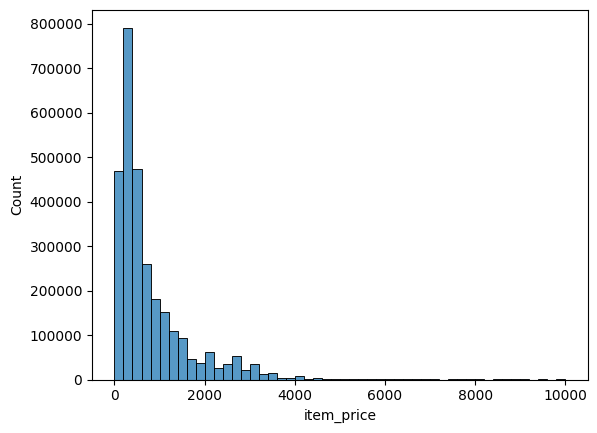

In [32]:
sns.histplot(filtered_train['item_price'], bins = 50)
# вроде стало лучше

In [46]:
#группировка по месяцами
grouped_train = filtered_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg(item_cnt_month = ('item_cnt_day', 'sum')).reset_index()

In [66]:
grouped_train.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [79]:
# добавили категорию товара

grouped_train.join(items[['item_id', 'item_category_id']], lsuffix='item_id',rsuffix='item_id', on ='item_id')

,item_id,date_block_num,shop_id,item_iditem_id,item_cnt_month,item_iditem_id,item_category_id
0,32,0,0,32,6.0,32,40
1,33,0,0,33,3.0,33,37
2,35,0,0,35,1.0,35,40
3,43,0,0,43,1.0,43,40
4,51,0,0,51,2.0,51,57
...,...,...,...,...,...,...,...
1599512,22087,33,59,22087,6.0,22087,83
1599513,22088,33,59,22088,2.0,22088,83
1599514,22091,33,59,22091,1.0,22091,83
1599515,22100,33,59,22100,1.0,22100,42
